#### **Distribution of Infection Time on Triangle Network**

The experiment below is designed to demonstrate that the observed infection delay is not independent of the alleged infection tree. In particular, in a cyclic network the distribution of the observed infection delay depends on the subtree created by the infections propagation over the network.

To demonstrate this we simulated infections on the simple 3-node triangle network show in the image below. The three trees shown correspond to the order in which the nodes are infected.

Empirical pdfs derived from our simulations are included below and demonstrate clearly that distribution of the observed infection delay depends on the infection subtree.


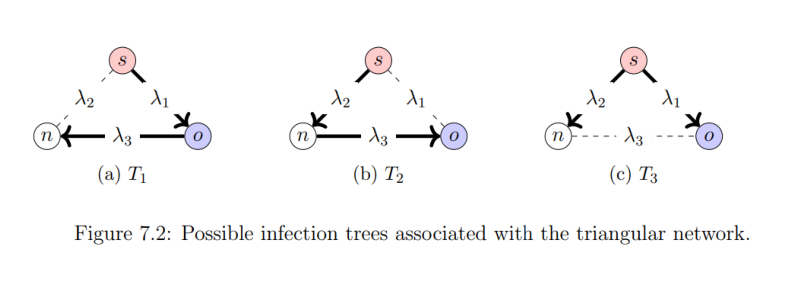

In [34]:
# @title

from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("../images/triangle_infectiontrees.png")
plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.axis("off")
plt.show()

In [48]:
import itertools as itt
import random as rn
import networkx as nx
import numpy as np
import copy

def infect_triangle(num_runs=10, rates=[0.5, 2, 1]):
    """infect triangle and record the infection tree created and the infection time for each run

    :param num_runs: number of infections to simulate
    :param rates: rates of exponential delays
    :return: dictionary of infection times for each infection tree and all combined
    """
    infection_times = {'all_trees': [], 'tree_1': [], 'tree_2': [], 'tree_3': [], 'tree_3_observer_first': [],
                       'tree_3_observer_second': [], 'rates': rates}
    for _ in range(num_runs):
        r1 = rates[0]
        r2 = rates[1]
        r3 = rates[2]
        x1 = np.random.default_rng().exponential(1 / r1, 1)[0]
        x2 = np.random.default_rng().exponential(1 / r2, 1)[0]
        if x1 < x2:
            x2 = np.random.default_rng().exponential(1 / r2, 1)[0]
            x3 = np.random.default_rng().exponential(1 / r3, 1)[0]
            if x3 < x2:
                infection_times['tree_1'].append(x1)
                infection_times['all_trees'].append(x1)
            else:
                infection_times['tree_3'].append(x1)
                infection_times['tree_3_observer_first'].append(x1)
                infection_times['all_trees'].append(x1)
        else:
            x1 = np.random.default_rng().exponential(1 / r1, 1)[0]
            x3 = np.random.default_rng().exponential(1 / r3, 1)[0]
            if x3 < x1:
                infection_times['tree_2'].append(x2 + x3)
                infection_times['all_trees'].append(x2 + x3)
            else:
                infection_times['tree_3'].append(x2+x1)
                infection_times['tree_3_observer_second'].append(x2+x1)
                infection_times['all_trees'].append(x2+x1)

    return infection_times

import matplotlib.pyplot as plt
import numpy as np

def plot_histograms(data_dict, bins=30, skip_keys=None, name_map=None):
    if skip_keys is None:
        skip_keys = []
    if name_map is None:
        name_map = {}

    for key, values in data_dict.items():

        if key in skip_keys:
            continue

        if len(values) == 0:
            continue

        display_name = name_map.get(key, key)

        plt.figure()
        plt.hist(values, bins=bins,density=True, alpha=0.7)
        plt.title(f"Empirical Distribution of Infection Times on {display_name}")
        plt.xlabel("Value")
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.show()


import matplotlib.pyplot as plt
import numpy as np
import math

def plot_histograms1(data_dict, n_sims,bins=30, skip_keys=None, name_map=None, n_cols=3):
    if skip_keys is None:
        skip_keys = []
    if name_map is None:
        name_map = {}

    # Filter items first
    items = [
        (k, v) for k, v in data_dict.items()
        if k not in skip_keys and len(v) > 0
    ]

    n = len(items)
    n_rows = math.ceil(n / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
    axes = axes.flatten()

    for ax, (key, values) in zip(axes, items):
        display_name = name_map.get(key, key)

        ax.hist(values, bins=bins, density=True, alpha=0.7)
        #ax.set_title(f"Empirical Distribution\n{display_name} (n = {len(values)})")
        ax.set_title(f"{display_name}\n(Sample size = {len(values)})\n(Proportion = {len(values)/n_sims:.2f})")
        ax.set_xlabel("Value")
        ax.set_ylabel("Density")
        ax.grid(True)

    # Turn off unused axes
    for ax in axes[len(items):]:
        ax.axis("off")

    # Global title
    fig.suptitle("Empirical Distributions of Infection Times", fontsize=18)

    plt.tight_layout()
    plt.show()






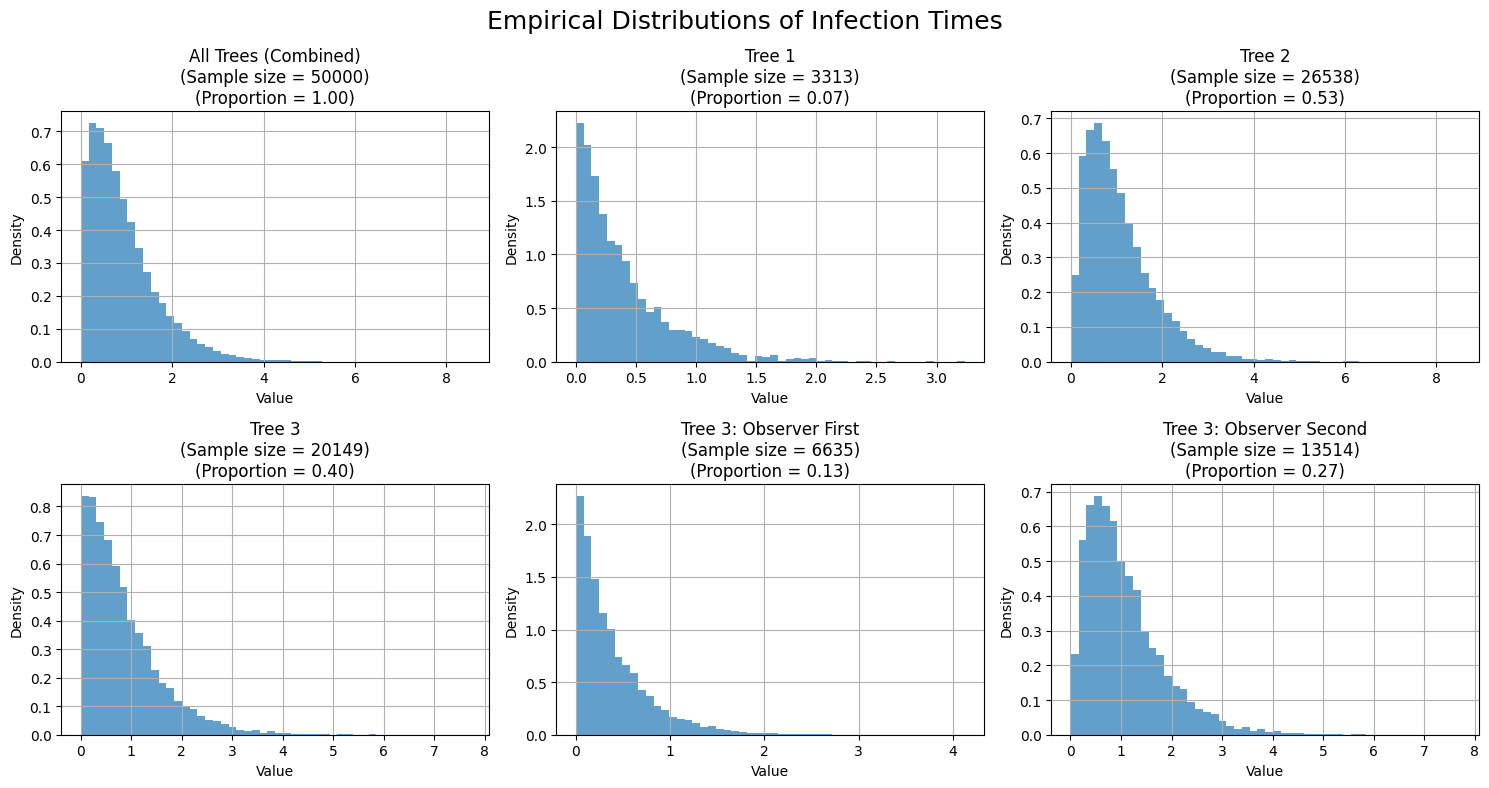

In [49]:
custom_names = {
    "all_trees": "All Trees (Combined)",
    "tree_1": "Tree 1",
    "tree_2": "Tree 2",
    "tree_3": "Tree 3",
    "tree_3_observer_first": "Tree 3: Observer First",
    "tree_3_observer_second": "Tree 3: Observer Second",
}

num_runs=50000
infection_times = infect_triangle(num_runs=num_runs, rates=[0.5, 2, 1])
plot_histograms1(
    infection_times,
    n_sims=num_runs,
    bins=50,
    skip_keys=["rates"],
    name_map=custom_names
)
